# Aggregrating algorithm

### Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and preprocessing the data

In [2]:
def get_data(filename):
    data = np.genfromtxt(filename)
    data = np.delete(data, [0, 1, 2, 4, 6, 8, 10], axis = 1)
    return data

In [3]:
experts_predictions = get_data("tennis1.txt")
experts_predictions

array([[0.51469399, 0.52      , 0.49333333, 0.51786639],
       [0.795053  , 0.77067669, 0.78761062, 0.78570195],
       [0.6626506 , 0.67058823, 0.62025317, 0.66757804],
       ...,
       [0.76190476, 0.75      , 0.74020619, 0.77601411],
       [0.6203474 , 0.63414634, 0.63092269, 0.61357074],
       [0.79086116, 0.80431177, 0.77981651, 0.82089552]])

### Algorithm

In [37]:
def AA_Brier(experts_predictions, outcomes):
    T, N = experts_predictions.shape
    weights = np.tile(np.random.randn(1, 1)[0], (1, N))
    weights = weights/sum(weights)
    
    # Helper functions
    def generalised_prediction(p_t, gamma_t, substitute):
        exp = np.fromiter(map(math.exp, -2 * substitute(gamma_t)), dtype = np.float)
        return -0.5 * math.log(np.dot(p_t, exp))
    
    
    predict = lambda p_t, gamma_t: 0.5 - ((generalised_prediction(p_t, gamma_t, lambda gamma: (1 - gamma)**2) 
                                          - generalised_prediction(p_t, gamma_t, lambda gamma: gamma**2)) / 2)
    
    loss = lambda prediction: (1 - prediction)**2
    update_weights = lambda weights, loss: weights * np.fromiter(map(math.exp, -2 * loss), dtype = np.float)
    
    predictions = []
    experts_losses = []
    
    # Putting them together
    for experts_prediction in experts_predictions:
        experts_loss = np.fromiter(map(loss, experts_prediction), dtype = np.float)
        
        p = predict(weights, experts_prediction)
        predictions.append(p)
        experts_losses.append(experts_loss)
        
        weights = update_weights(weights, experts_loss)
        weights = weights/sum(weights)
        
    return predictions, np.array(experts_losses)

In [44]:
np.random.seed(0) # for reproducibility
predictions, experts_losses = AA_Brier(experts_predictions, 0)

### Total loss of the AA

In [39]:
loss = lambda prediction: (1 - prediction)**2
aa_losses = np.fromiter(map(loss, predictions), dtype = np.float)
total_loss = sum(aa_losses)
print(total_loss)

1971.781849552859


### AA and Experts loss over time

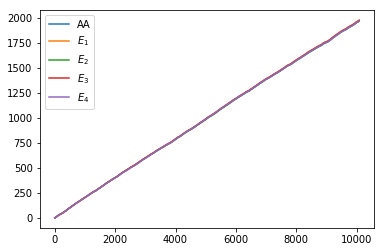

In [40]:
plt.plot(np.cumsum(aa_losses))
plt.plot(np.cumsum(experts_losses[:, 0]))
plt.plot(np.cumsum(experts_losses[:, 1]))
plt.plot(np.cumsum(experts_losses[:, 2]))
plt.plot(np.cumsum(experts_losses[:, 3]))
plt.legend(("AA", "$E_1$", "$E_2$", "$E_3$", "$E_4$"))
plt.show()

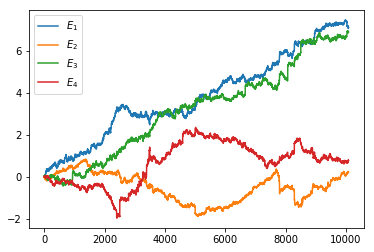

In [41]:
plt.plot(np.cumsum(experts_losses[:, 0] - aa_losses))
plt.plot(np.cumsum(experts_losses[:, 1] - aa_losses))
plt.plot(np.cumsum(experts_losses[:, 2] - aa_losses))
plt.plot(np.cumsum(experts_losses[:, 3] - aa_losses))
plt.legend(("$E_1$", "$E_2$", "$E_3$", "$E_4$"))
plt.show()

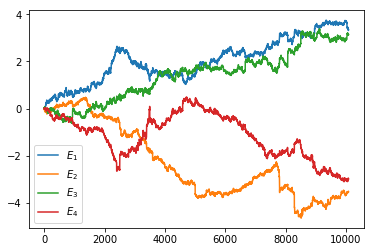

In [43]:
average_loss = np.sum(experts_losses, axis = 1) * (1/4)
plt.plot(np.cumsum(experts_losses[:, 0] - average_loss))
plt.plot(np.cumsum(experts_losses[:, 1] - average_loss))
plt.plot(np.cumsum(experts_losses[:, 2] - average_loss))
plt.plot(np.cumsum(experts_losses[:, 3] - average_loss))
plt.legend(("$E_1$", "$E_2$", "$E_3$", "$E_4$"))
plt.show()